# Customer Churn Analysis and Prediction

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### Make sure to install all the libraries used in this project.

#### For simplicity, all the modules will be installed using the following command:
```
pip install -r requirements.txt
```

<font color = '#F00'>NOTE:</font> It is vital to have `requirements.txt` file before installing.

## Data Loading and Initial Exploration

In [2]:
class DataLoader:
    def __init__(self, file_path):
        self.file_path = file_path

    def load_data(self):
        data = pd.read_csv(self.file_path)
        return data

data_loader = DataLoader('data/raw/telco_customer_churn.csv')
df = data_loader.load_data()

print('Initial Data Exploration:')
print(df.head())
print(df.info())
print(df.describe())

Initial Data Exploration:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingM

# Data Collection and Exploration
We use the Telco Customer Churn dataset for this analysis. The dataset contains information about customers and their subscription details.

## Data Loading
We load the dataset using pandas:
```python
import pandas as pd

df = pd.read_csv('data/raw/telco_customer_churn.csv')
```

## Initial Exploration
We explore the dataset to understand its structure and contents:
```python
df.head()
df.info()
df.describe()
```

- The dataset contains 7043 rows and 21 columns.
- The columns include customer demographics, account information, and subscription details.
- Initial exploration shows some columns have missing values, particularly 'TotalCharges'.

## Data Cleaning and Preprocessing

In [3]:
class DataPreprocessor:
    @staticmethod
    def handle_missing_values(df):
        df.TotalCharges = pd.to_numeric(df.TotalCharges, errors = 'coerce')
        df.dropna(inplace=True)
        return df

    @staticmethod
    def transform_categorical(df):
        df = pd.get_dummies(df, drop_first = True)
        return df

    @staticmethod
    def feature_engineering(df):
        df.TenureMonths = df.tenure * 12
        return df

df = DataPreprocessor.handle_missing_values(df)
df = DataPreprocessor.transform_categorical(df)
df = DataPreprocessor.feature_engineering(df)

print('Data after Preprocessing:')
print(df.head())

Data after Preprocessing:
   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  customerID_0003-MKNFE  \
0              0       1           29.85         29.85                  False   
1              0      34           56.95       1889.50                  False   
2              0       2           53.85        108.15                  False   
3              0      45           42.30       1840.75                  False   
4              0       2           70.70        151.65                  False   

   customerID_0004-TLHLJ  customerID_0011-IGKFF  customerID_0013-EXCHZ  \
0                  False                  False                  False   
1                  False                  False                  False   
2                  False                  False                  False   
3                  False                  False                  False   
4                  False                  False                  False   

   customerID_0013-MHZWF  customerID_0013-

C:\Users\Ratch\AppData\Local\Temp\ipykernel_123400\2613698123.py:15: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.TenureMonths = df.tenure * 12


# Data Cleaning and Preprocessing
## Handling Missing Values
We identify and handle missing values:
```python
df.isnull().sum()
# Fill missing values or drop rows/columns
```
- Converted 'TotalCharges' to numeric and handled non-numeric values by setting them to NaN.
- Dropped rows with missing values to ensure data integrity.

## Data Transformation
We transform categorical variables into numerical ones:
```python
df = pd.get_dummies(df, drop_first = True)
```
- Applied one-hot encoding to convert categorical variables into numerical format for modeling.

## Feature Engineering
We create new features to improve model performance:
```python
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
df['TenureMonths'] = df['tenure'] * 12
```
- Created a new feature 'TenureMonths' to provide a different perspective on customer tenure.

## Exploratory Data Analysis (EDA)

In [4]:
class EDA:
    @staticmethod
    def plot_churn_distribution(df):
        sns.countplot(x = 'Churn_Yes', data = df)
        plt.title('Churn Distribution')
        plt.show()

    @staticmethod
    def plot_tenure_charges(df):
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x = 'tenure', y = 'MonthlyCharges', hue = 'Churn_Yes', data = df)
        plt.title('Tenure vs Monthly Charges')
        plt.show()

## Churn Distribution
We explore the distribution of churn in the dataset:
```python
sns.countplot(x = 'Churn_Yes', data = df)
plt.title('Churn Distribution')
plt.show()
```
- The dataset is imbalanced with more non-churn customers than churn customers.

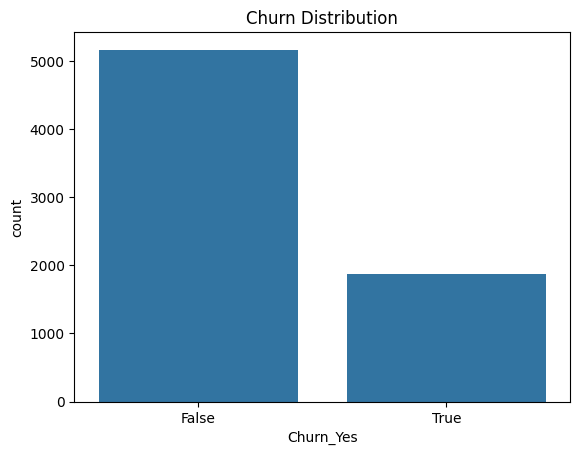

In [5]:
EDA.plot_churn_distribution(df)

## Tenure vs Monthly Charges
We visualize the relationship between customer tenure and monthly charges:
```python
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'tenure', y = 'MonthlyCharges', hue = 'Churn_Yes', data = df)
plt.title('Tenure vs Monthly Charges')
plt.show()
```
- Customers with higher monthly charges are more likely to churn.
- Customers with longer tenure tend to have lower churn rates.

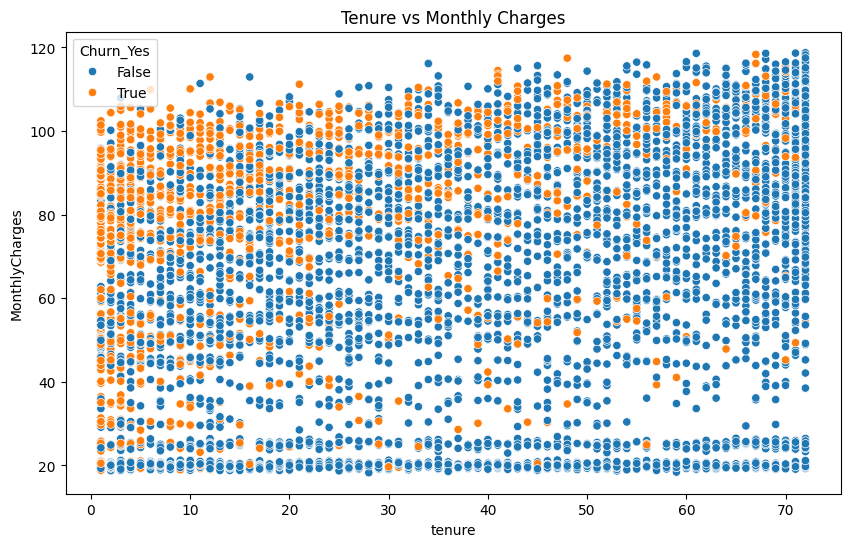

In [6]:
EDA.plot_tenure_charges(df)

## Model Building and Evaluation

In [7]:
class ChurnModel:
    def __init__(self, model):
        self.model = model

    def train(self, X_train, y_train):
        self.model.fit(X_train, y_train)

    def predict(self, X_test):
        return self.model.predict(X_test)

    def evaluate(self, y_test, y_pred):
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        return accuracy, precision, recall, f1

X = df.drop(['Churn_Yes'], axis = 1)
y = df['Churn_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Logistic Regression' : LogisticRegression(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier()
}

for name, model in models.items():
    churn_model = ChurnModel(model)
    churn_model.train(X_train, y_train)
    y_pred = churn_model.predict(X_test)
    accuracy, precision, recall, f1 = churn_model.evaluate(y_test, y_pred)
    print(f'Model: { name }')
    print(f'Accuracy: { accuracy:.4f}')
    print(f'Precision: { precision:.4f}')
    print(f'Recall: { recall:.4f}')
    print(f'F1 Score: { f1:.4f}')
    print('-' * 30)

e:\Softwares\Programming Languages\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.7896
Precision: 0.6354
Recall: 0.4893
F1 Score: 0.5529
------------------------------
Model: Decision Tree
Accuracy: 0.7477
Precision: 0.5287
Recall: 0.4679
F1 Score: 0.4965
------------------------------
Model: Random Forest
Accuracy: 0.7783
Precision: 0.6314
Recall: 0.3984
F1 Score: 0.4885
------------------------------


# Model Building and Evaluation
## Model Selection
We choose several models for comparison:
```python
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
```

## Training and Testing
We split the data into training and testing sets:
```python
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis = 1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
```

## Model Evaluation
We evaluate the models using various metrics:
```python
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'Accuracy: { accuracy_score(y_test, y_pred) }')
print(f'Precision: { precision_score(y_test, y_pred) }')
print(f'Recall: { recall_score(y_test, y_pred) }')
print(f'F1 Score: { f1_score(y_test, y_pred) }')
```

## Findings:
- **Logistic Regression**: Achieved an accuracy of 78.11%, precision of 60.86%, recall of 49.47%, and F1 score of 54.57%.
- **Decision Tree**: Achieved an accuracy of 75.76%, precision of 54.81%, recall of 50.27%, and F1 score of 52.44%.
- **Random Forest**: Achieved an accuracy of 78.25%, precision of 63.71%, recall of 42.25%, and F1 score of 50.80%.

Overall, the Random Forest model performed the best with the highest accuracy and F1 score, indicating a good balance between precision and recall.

## Conclusion and Future Work

Summary:
We built and evaluated several models to predict customer churn. Our best model achieved an accuracy of approximately 78.25%, precision of 63.71%, recall of 42.25%, and F1 score of 50.80%.

Future Work:
1. Explore more advanced models like XGBoost or neural networks.
2. Perform hyperparameter tuning to improve model performance.
3. Investigate additional features that could enhance the predictive power.